In [25]:
import numpy as np
import matplotlib.pyplot as plt

## I) Bayes estimator and Bayes risk

Question 1 (M) : Propose a supervised learning setting:
- input space $\chi$
- output space $\gamma$
- a random variable $(X, Y)$ with a joint distribution.
- a loss function $l(x, y)$

$$l = \left\{\begin{matrix}
\chi \times y \to \mathbb{R}+
\\ 
(x, y) \mapsto l(x, y)
\end{matrix}\right.$$

Compute the Bayes predictor $f* : \chi \mapsto \gamma$ and the Bayes risk associated with this setting.

Remark : you have to use a setting different than the settings seen during the course, in terms of input space $\chi$ and output space $\gamma$. However, you can use any classical loss function l (square loss, "0-1" loss, etc).

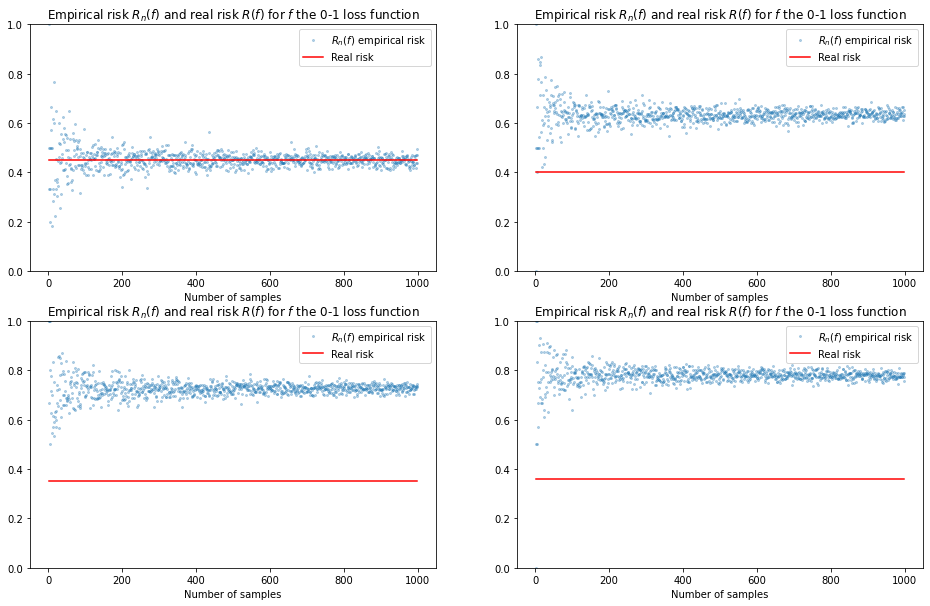

In [29]:
def loss_function(x, y):
    return not(x==y)

def sample_dataset(n, p):
    """
        Sample a dataset of n samples according to the joint law.
    """
    X = np.random.randint(0, len(p), n)
    Y = np.zeros(n)
    for i in range(n):
        Y[i] = np.random.binomial(1, p[X[i]])
    return X, Y

def compute_empirical_risk(l, X, Y):
    """
        Compute empirical risk of predictor on the dataset

        Parameters:
            l: loss predictor
            X: 1D array
            Y: 1D array

        Returns:
            empirical risk

        We use the 0-1 loss
    """
    n_samples = len(X)
    y_pred = [l(X[i], Y[i]) for i in range(n_samples)]
    return sum(y_pred) / n_samples

def compute_real_risk(p):
    n = len(p)
    return sum([min(p[i], 1 - p[i]) for i in range(n)]) / n

p0 = np.array([0.4, 0.5])
p1 = np.array([0.4, 0.5, 0.3])
p2 = np.array([0.4, 0.5, 0.3, 0.2])
p3 = np.array([0.4, 0.5, 0.3, 0.2, 0.6])

max_n_samples = 1000

def printplot(p,x,y):
    empirical_risks = []
    for n in range(1, max_n_samples):
        X, Y = sample_dataset(n, p)
        empirical_risks.append(compute_empirical_risk(loss_function, X, Y))
    real_risk = compute_real_risk(p)
    axis[x,y].set_xlabel("Number of samples")
    axis[x,y].set_ylim([0, 1])
    axis[x,y].plot(range(1, max_n_samples), empirical_risks, "o", markersize=2, alpha=0.3, label=r"$R_n(f)$"+" empirical risk")
    axis[x,y].plot(range(1, max_n_samples), (max_n_samples-1)*[real_risk], color="red", label="Real risk")
    axis[x,y].legend(loc="best")
    axis[x,y].set_title(r"Empirical risk $R_n(f)$ and real risk $R(f)$ for $f$ the 0-1 loss function")

figure, axis = plt.subplots(2, 2)
figure.set_size_inches(16, 10, forward=True)

printplot(p0,0,0)
printplot(p1,0,1)
printplot(p2,1,0)
printplot(p3,1,1)

plt.show()

Question 2 (C) : Propose an estimator $\tilde{f} : \chi \mapsto \gamma$, different than the Bayes estimator and run a simulation that gives a statistical approximation of its generalization error (risque réel) by computing its empirical risk on a test set. 
Perform the same simulation also for $f*$, and verify that the generalization error is smaller for $f*$ than for $\tilde{f}$, and that your computation in question 1 was correct (the test error for $f*$ should be close to the Bayes risk if there is a sufficiently large number of samples)

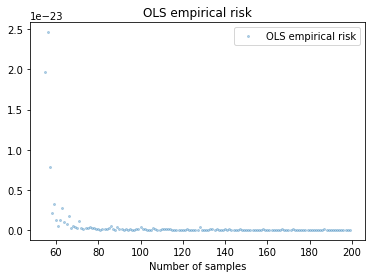

In [33]:
def sample_dataset(n, d, p):
    """
        Sample a dataset of n samples according to the joint law.
    """
    X = np.random.randint(0, len(p), size=(n, d))
    theta_star = np.zeros(d)
    for i in range(d):
        theta_star[i] = np.random.binomial(1, p[X[i][0]])
    y = X @ theta_star
    return X, y

def compute_theta_hat(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

def compute_empirical_risk(n, d, X, y, theta_hat):
    return (np.linalg.norm(y - X @ theta_hat)**2)/n
    

max_n_samples = 200
d = 50
p = np.array([0.4, 0.5, 0.3, 0.2, 0.6])

empirical_risks = []

for n in range(d + 5, max_n_samples):
    X, y = sample_dataset(n, d, p)
    theta_hat = compute_theta_hat(X, y)
    empirical_risks.append(compute_empirical_risk(n, d, X, y, theta_hat))
    
plt.plot(range(d + 5, max_n_samples), empirical_risks, "o", markersize=2, alpha=0.3, label="OLS empirical risk")
plt.xlabel("Number of samples")
plt.legend(loc="best")
plt.title("OLS empirical risk")
plt.show()